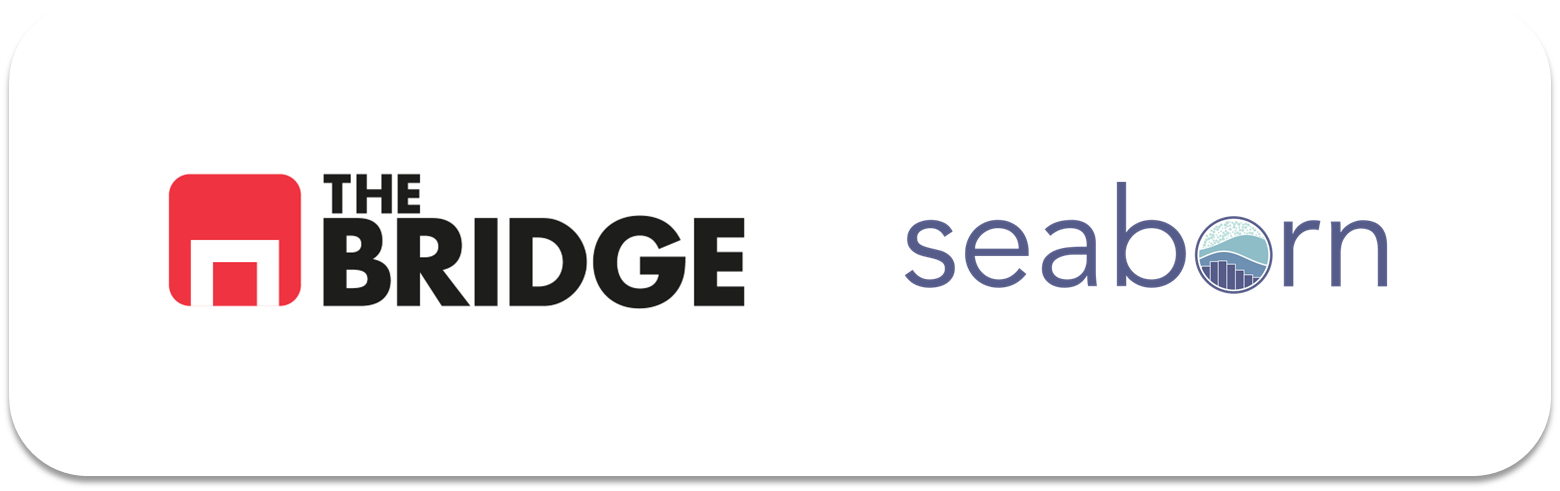

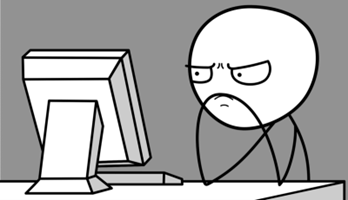

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [46]:
# Cargar los datasets
titanic_df = pd.read_csv("./data/titanic.csv")
bitcoin_df = pd.read_csv("./data/BTC.csv")
viajes_df = pd.read_csv("./data/dataset_viajes_jun23.csv")

# Convertir la columna "date" a datetime y establecerla como índice en el dataset de Bitcoin
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
bitcoin_df.set_index('date', inplace=True)

# Mostrar un vistazo a los tres datasets
titanic_df.head(), bitcoin_df.head(), viajes_df.head()


(   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
 0         0       3    male  22.0      1      0   7.2500        S  Third   
 1         1       1  female  38.0      1      0  71.2833        C  First   
 2         1       3  female  26.0      0      0   7.9250        S  Third   
 3         1       1  female  35.0      1      0  53.1000        S  First   
 4         0       3    male  35.0      0      0   8.0500        S  Third   
 
      who  adult_male deck  embark_town alive  alone  
 0    man        True  NaN  Southampton    no  False  
 1  woman       False    C    Cherbourg   yes  False  
 2  woman       False  NaN  Southampton   yes   True  
 3  woman       False    C  Southampton   yes  False  
 4    man        True  NaN  Southampton    no   True  ,
                   unix   symbol      open      high       low     close  \
 date                                                                      
 2022-03-01  1646092800  BTC/USD  43221.71  43626.49 

### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [47]:
def plot_absolute_frequencies(dataframe, categorical_columns):
    """
    Dibuja una matriz de gráficas de barras con las frecuencias absolutas de las columnas categóricas.

    Args:
        dataframe (pd.DataFrame): El dataframe con los datos.
        categorical_columns (list): Lista de nombres de columnas categóricas a graficar.
    """
    # Determinar el número de filas necesarias para organizar las gráficas
    num_columns = 2  # Número de columnas en la matriz de gráficas
    num_rows = math.ceil(len(categorical_columns) / num_columns)
    
    # Crear la figura y los subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Aplanar los ejes para fácil indexación

    for i, column in enumerate(categorical_columns):
        ax = axes[i]
        sns.countplot(data=dataframe, x=column, ax=ax)
        ax.set_title(f"Frecuencias Absolutas de {column}", fontsize=14)
        ax.set_ylabel("Frecuencia", fontsize=12)
        ax.set_xlabel(column, fontsize=12)

    # Ocultar subplots vacíos si hay más subplots que columnas
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.show()

# Ejemplo de uso (asumiendo que tienes un dataframe cargado)
# plot_absolute_frequencies(titanic_df, ['Sex', 'Embarked', 'Pclass'])





### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


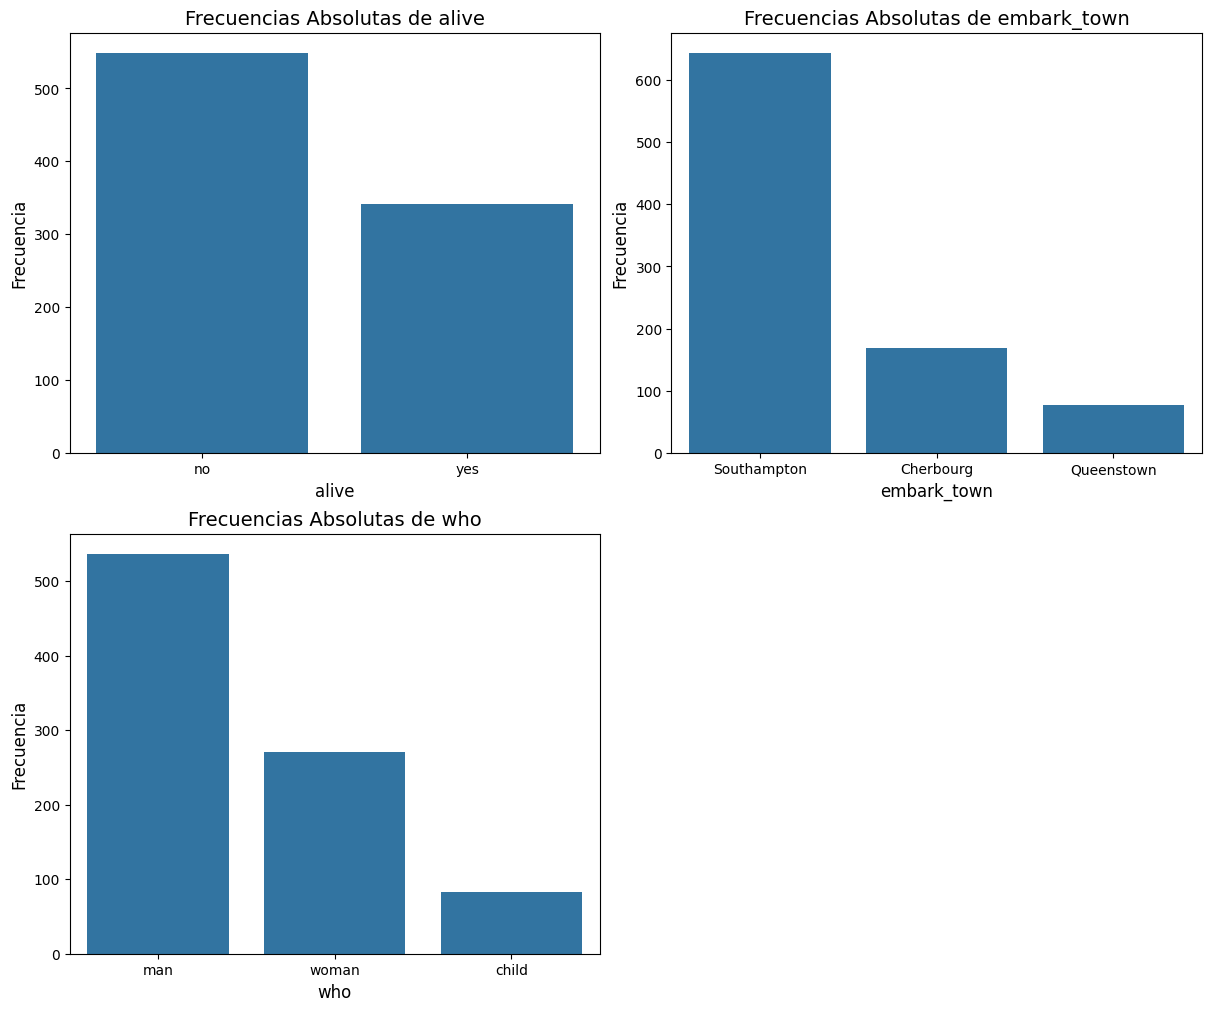

In [48]:
# Ejecutar la función con las columnas categóricas especificadas
plot_absolute_frequencies(titanic_df, ['alive', 'embark_town', 'who'])


### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [49]:
def plot_histograms(dataframe, numerical_columns, bins=10, include_density=False):
    """
    Dibuja una matriz de histogramas para las columnas numéricas con opción de incluir la función de densidad.

    Args:
        dataframe (pd.DataFrame): El dataframe con los datos.
        numerical_columns (list): Lista de nombres de columnas numéricas a graficar.
        bins (int): Número de bins para los histogramas.
        include_density (bool): Si True, se incluye la función de densidad en las gráficas.
    """
    # Determinar el número de filas necesarias para organizar las gráficas
    num_columns = 2  # Número de columnas en la matriz de gráficas
    num_rows = math.ceil(len(numerical_columns) / num_columns)

    # Crear la figura y los subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Aplanar los ejes para fácil indexación

    for i, column in enumerate(numerical_columns):
        ax = axes[i]
        sns.histplot(data=dataframe, x=column, bins=bins, kde=include_density, ax=ax)
        ax.set_title(f"Histograma de {column}", fontsize=14)
        ax.set_ylabel("Frecuencia", fontsize=12)
        ax.set_xlabel(column, fontsize=12)

    # Ocultar subplots vacíos si hay más subplots que columnas
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.show()

# Ejemplo de uso (asumiendo que tienes un dataframe cargado):
# plot_histograms(titanic_df, ['age', 'fare'], bins=20, include_density=True)



### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

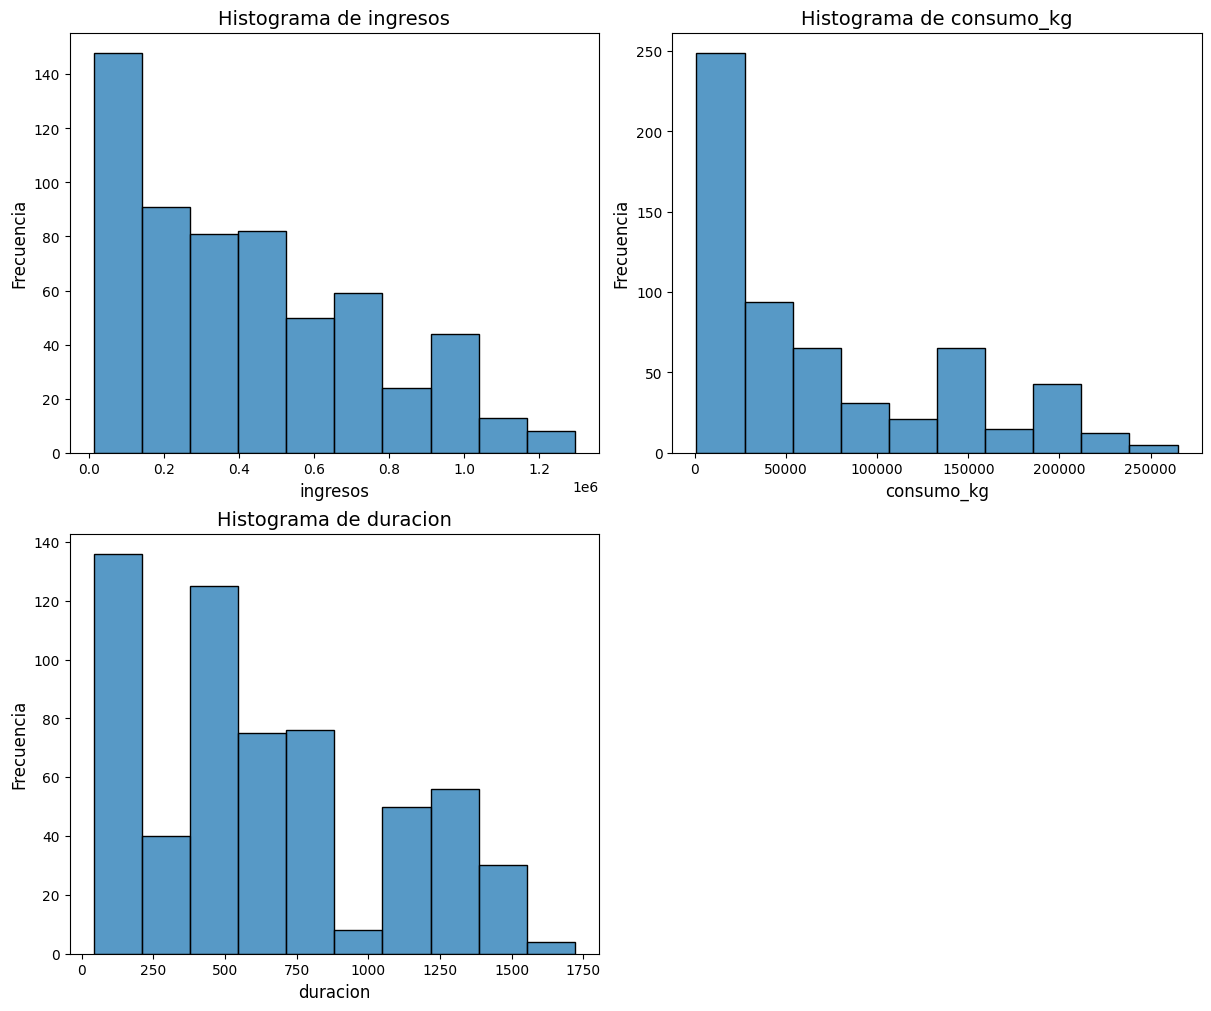

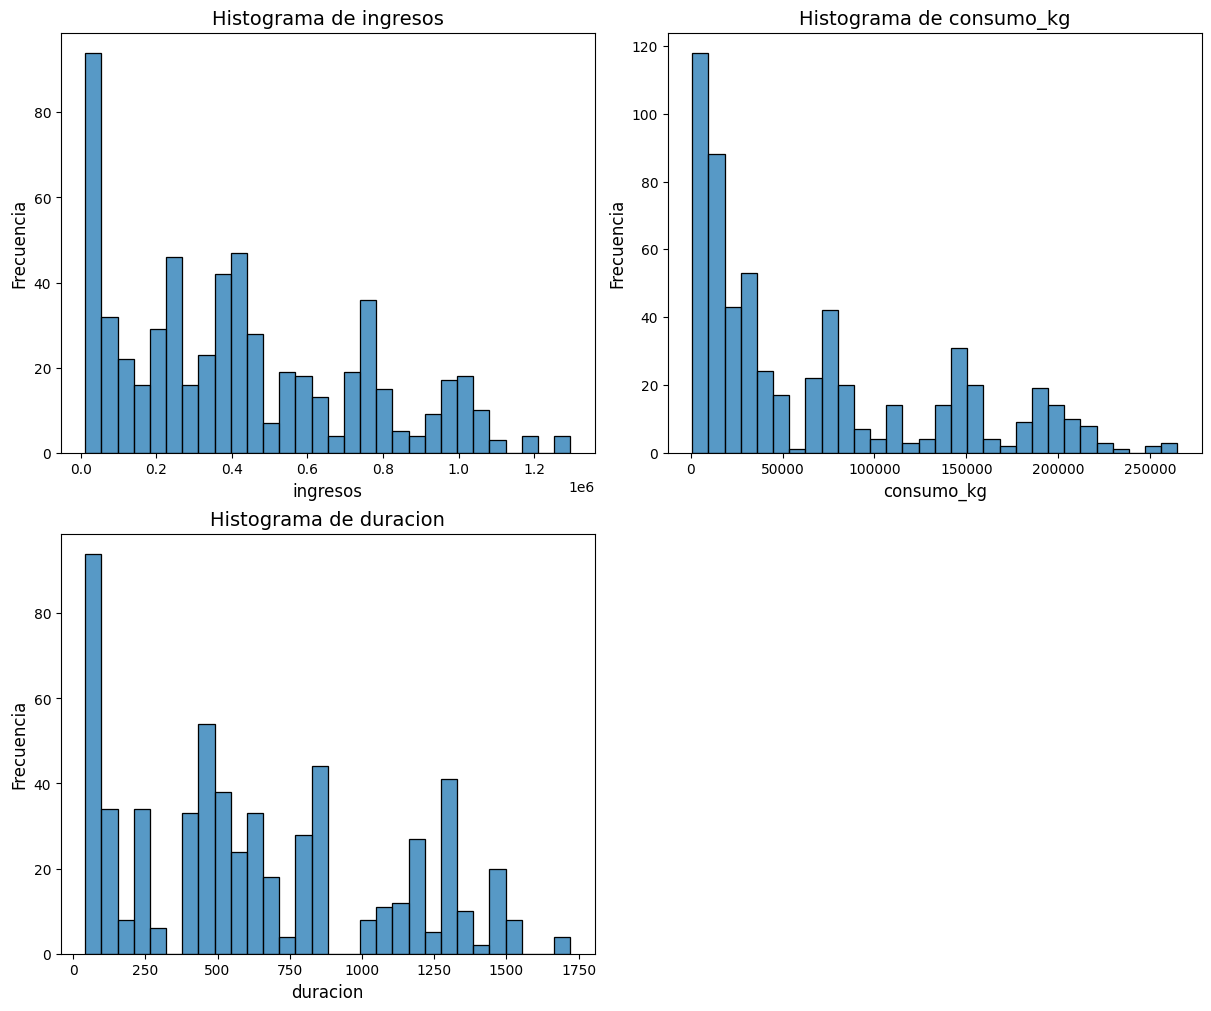

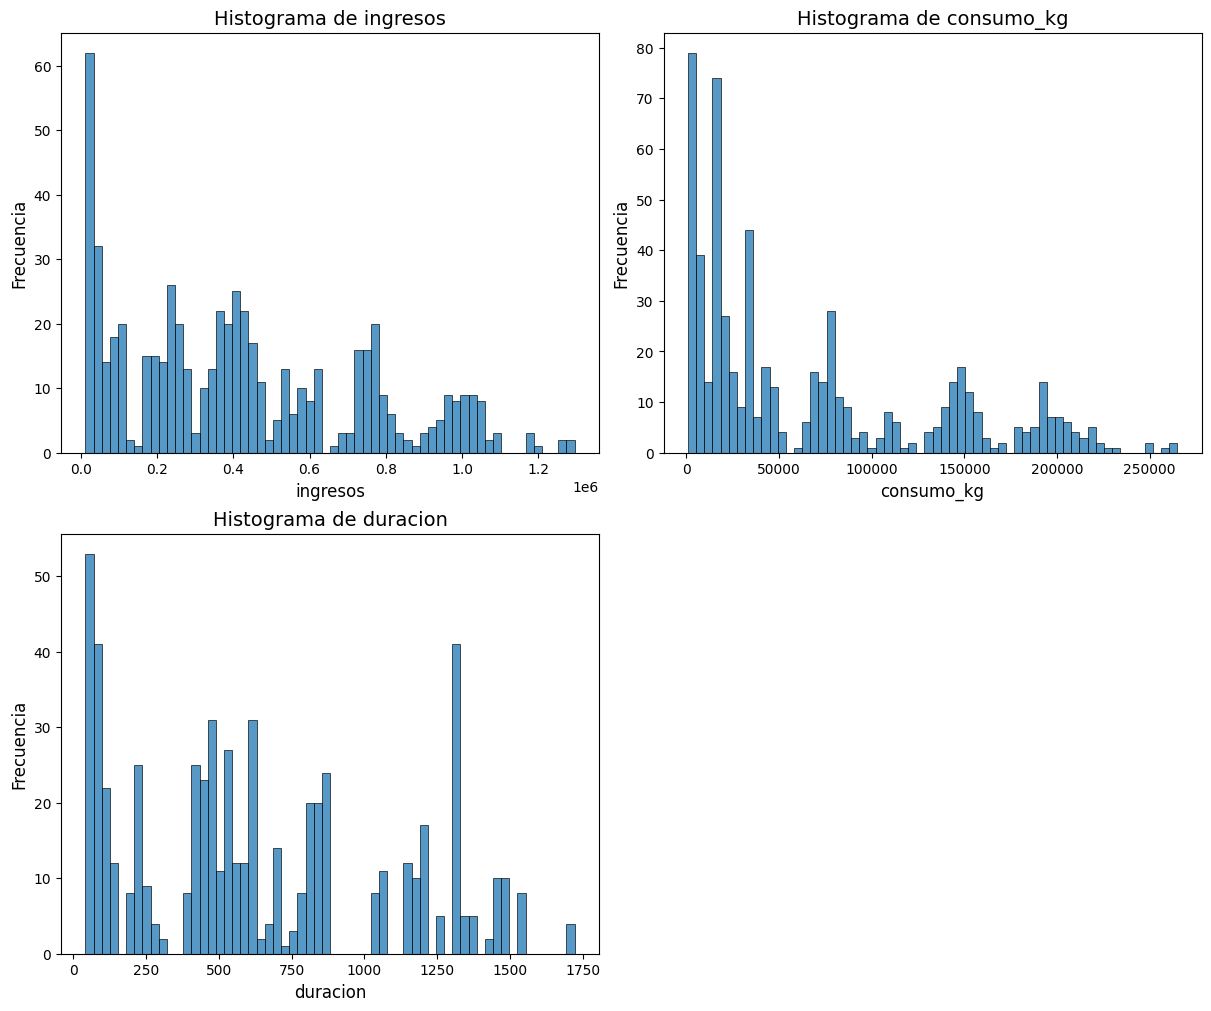

In [50]:
# Cargar el dataset de viajes
viajes_df = pd.read_csv("./data/dataset_viajes_jun23.csv")

# Aplicar la función de histogramas
plot_histograms(viajes_df, ['ingresos', 'consumo_kg', 'duracion'], bins=10, include_density=False)
plot_histograms(viajes_df, ['ingresos', 'consumo_kg', 'duracion'], bins=30, include_density=False)
plot_histograms(viajes_df, ['ingresos', 'consumo_kg', 'duracion'], bins=60, include_density=False)


### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [51]:
def plot_time_series(dataframe, numerical_columns):
    """
    Dibuja las columnas numéricas (series temporales o secuencias) en una matriz de gráficas.

    Args:
        dataframe (pd.DataFrame): El dataframe con los datos.
        numerical_columns (list): Lista de nombres de columnas numéricas a graficar.
    """
    # Determinar el número de filas necesarias para organizar las gráficas
    num_columns = 2  # Número de columnas en la matriz de gráficas
    num_rows = math.ceil(len(numerical_columns) / num_columns)

    # Crear la figura y los subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Aplanar los ejes para fácil indexación

    for i, column in enumerate(numerical_columns):
        ax = axes[i]
        ax.plot(dataframe[column], label=column)
        ax.set_title(f"Serie Temporal: {column}", fontsize=14)
        ax.set_ylabel("Valor", fontsize=12)
        ax.set_xlabel("Índice", fontsize=12)
        ax.legend()

    # Ocultar subplots vacíos si hay más subplots que columnas
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.show()

# Ejemplo de uso (si tienes un dataframe como bitcoin_df):
# plot_time_series(bitcoin_df, ['close', 'open', 'high', 'low'])


### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

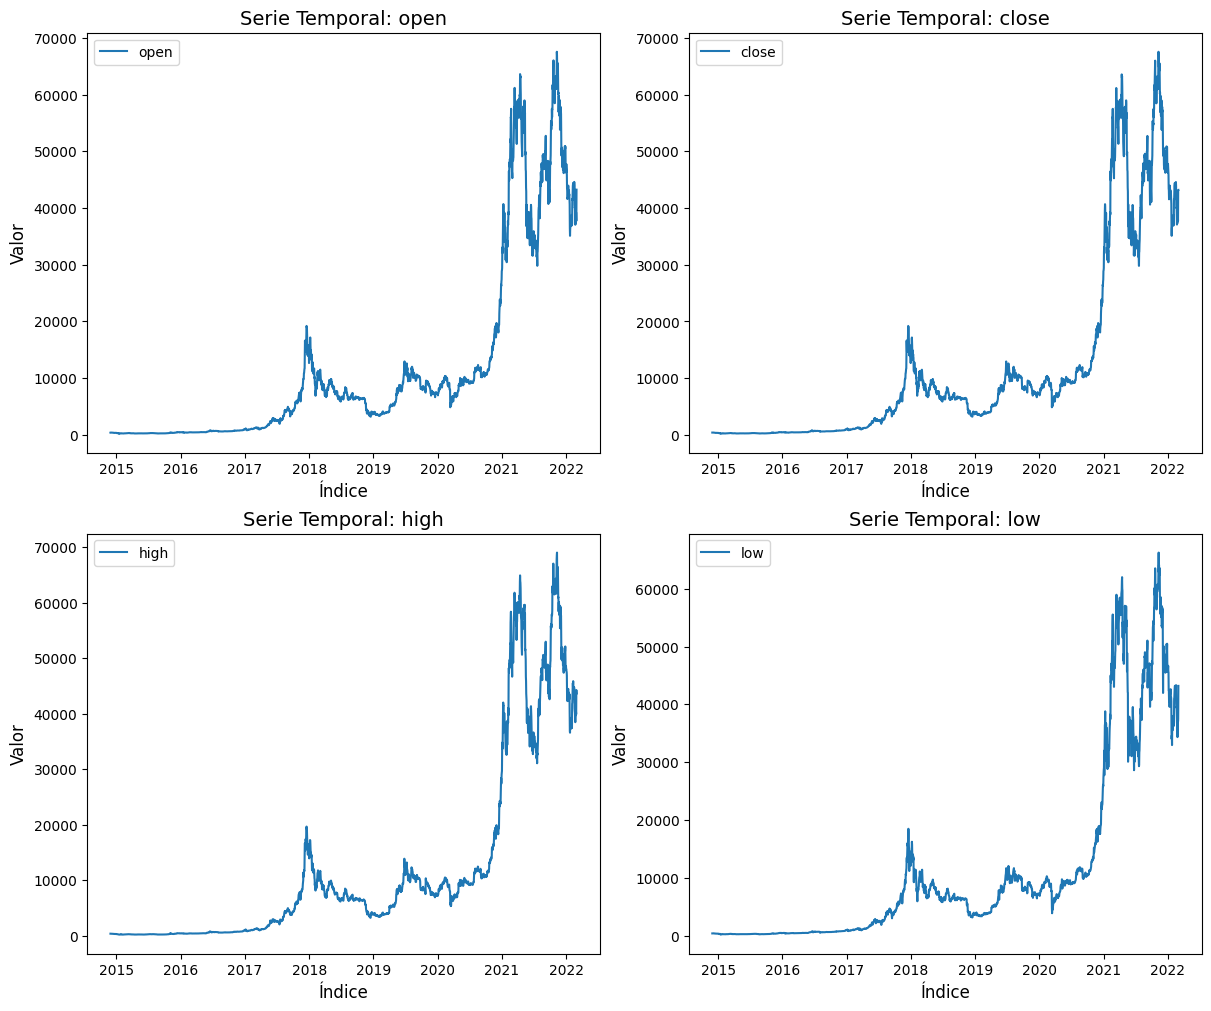

In [52]:
# Cargar el dataset de Bitcoin
bitcoin_df = pd.read_csv("./data/BTC.csv")

# Convertir la columna 'date' a datetime y establecerla como índice
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
bitcoin_df.set_index('date', inplace=True)

# Visualizar las columnas 'open', 'close', 'high', 'low'
plot_time_series(bitcoin_df, ['open', 'close', 'high', 'low'])



### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [53]:
def plot_time_series_with_options(dataframe, numerical_columns, combined=False, start_date=None, end_date=None):
    """
    Dibuja series temporales con opciones de combinación en una sola gráfica y filtros por fecha.

    Args:
        dataframe (pd.DataFrame): El dataframe con los datos.
        numerical_columns (list): Lista de nombres de columnas numéricas a graficar.
        combined (bool): Si True, combina todas las series en una sola gráfica.
        start_date (str): Fecha de inicio para filtrar los datos (formato 'YYYY-MM-DD').
        end_date (str): Fecha de fin para filtrar los datos (formato 'YYYY-MM-DD').
    """
    # Filtrar por fecha si se proporcionan valores
    if start_date or end_date:
        dataframe = dataframe.loc[start_date:end_date]

    if combined:
        # Gráfica combinada con todas las líneas
        plt.figure(figsize=(12, 6))
        for column in numerical_columns:
            sns.lineplot(data=dataframe, x=dataframe.index, y=column, label=column)
        plt.title("Evolución combinada de series temporales", fontsize=16)
        plt.xlabel("Fecha", fontsize=12)
        plt.ylabel("Valor", fontsize=12)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        # Determinar el número de filas necesarias para organizar las gráficas
        num_columns = 2  # Número de columnas en la matriz de gráficas
        num_rows = math.ceil(len(numerical_columns) / num_columns)

        # Crear la figura y los subplots
        fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 5), constrained_layout=True)
        axes = axes.flatten()  # Aplanar los ejes para fácil indexación

        for i, column in enumerate(numerical_columns):
            sns.lineplot(data=dataframe, x=dataframe.index, y=column, ax=axes[i])
            axes[i].set_title(f"Serie Temporal: {column}", fontsize=14)
            axes[i].set_ylabel("Valor", fontsize=12)
            axes[i].set_xlabel("Fecha", fontsize=12)

        # Ocultar subplots vacíos si hay más subplots que columnas
        for j in range(i + 1, len(axes)):
            axes[j].axis("off")

        plt.show()

# Ejemplo de uso:
# plot_time_series_with_options(bitcoin_df, ['open', 'close', 'high', 'low'], combined=True, start_date='2021-01-01', end_date='2022-01-01')



### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

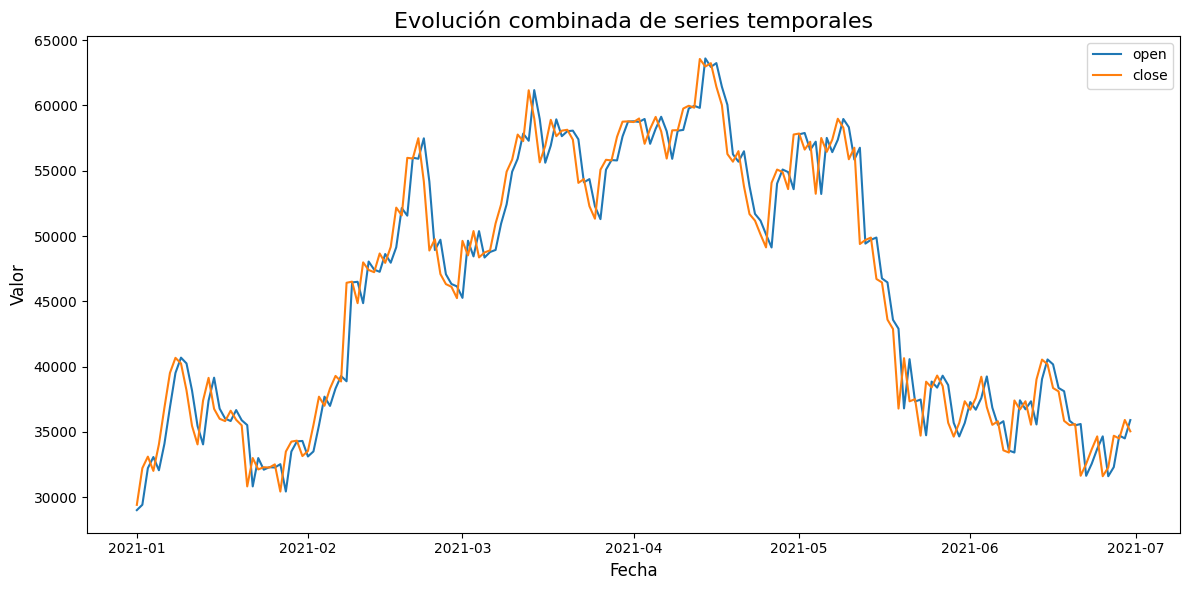

In [55]:
# Ordenar el índice por fecha
bitcoin_df = bitcoin_df.sort_index()

# Seleccionar el periodo más interesante y graficar
start_date = '2021-01-01'
end_date = '2021-06-30'

# Visualizar las variables 'open' y 'close' de forma conjunta
plot_time_series_with_options(bitcoin_df, ['open', 'close'], combined=True, start_date=start_date, end_date=end_date)
